In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
from pprint import pprint

In [2]:
featureSet = ['G_gender_enc','name_distance', 'loc_distance', 'username_distance', 'desc_distance', 'T_gender_enc']

In [3]:
#Use the Data files for this method
def plot_data(path, features, title="Some Model"):
    data = []
    
    with open(path, "r", encoding="utf-8") as datafile:
        for line in datafile:
            dataset = json.loads(line)
            linefeatures = dataset["Features"]
            if sorted(linefeatures) == sorted(features):
                data = dataset["Data"]
                break;
    
    x_fold = []
    y_prec = []
    y_rec = []
    y_acc = []
    y_f1 = []
    
    for fold in data:
        x_fold.append(fold['Fold'])
        y_prec.append(fold['Precision'])
        y_rec.append(fold['Recall'])
        y_acc.append(fold['Accuracy'])
        y_f1.append(fold['F1_score'] * 100)
    
    sns.set()
    plt.plot(x_fold, y_prec, color="blue", label="Precisiion")
    plt.plot(x_fold, y_rec, color="red", label="Recall")
    plt.plot(x_fold, y_acc, color="green", label="Accuracy")
    plt.plot(x_fold, y_f1, color="purple", label="F1 Score")
    plt.xlabel("Fold")
    plt.ylabel("Percentage %")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.ylim([60,100])
    plt.show()

In [24]:
#Use the result files for this method
def precision_recall_curve(paths, features, title=""):
    mean_prec = []
    mean_rec = []
    
    for path in paths:
        with open(path, "r", encoding="utf-8") as file:
            #Store results associated with a model
            model_results_prec = []
            model_results_rec = []
            #Store results associated with size of feature set
            curr_res_prec = []
            curr_res_rec = []
            setsize = 1
            for line in file:
                dataset = json.loads(line)
                #If the set size is the same add the desired metric to results
                if (setsize == len(dataset['Features'])):
                    curr_res_prec.append(dataset['Precision'])
                    curr_res_rec.append(dataset['Recall'])
                #Else increase setsize, calculate mean for setsize add to model results reset set size list
                else:
                    setsize += 1
                    model_results_prec.append(np.mean(curr_res_prec))
                    model_results_rec.append(np.mean(curr_res_rec))
                    curr_res_prec = []
                    curr_res_rec = []
                    curr_res_prec.append(dataset['Precision'])
                    curr_res_rec.append(dataset['Recall'])
            #One more time to account for the last featureset
            model_results_prec.append(np.mean(curr_res_prec))
            model_results_rec.append(np.mean(curr_res_rec))
            mean_prec.append(model_results_prec)
            mean_rec.append(model_results_rec)
#     print("precision")
#     pprint(mean_prec)
#     print("recall")
#     pprint(mean_rec)
    #careful that dictionary matches order of the files visited in paths
    model_colours = {"GaussianNB": "cyan",
                     "MultinomialNB": "black",
                     "SVC Linear": "yellow",
                     "SVC rbf": "magenta",
                     "Random Forrest": "forestgreen"}
    
    sns.set()
    
    #Lines commented out below plots all of them, uncomment at your own risk
    for recall,precision, model, colour in zip(mean_rec, mean_prec, model_colours.keys(), model_colours.values()):
        plt.plot([j for j in recall], [j for j in precision], color=colour, label=model)

    #plt.plot([j for j in mean_rec[0]], [j for j in mean_prec[0]], color="m", label="GaussianNB")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower right")
    plt.title(str(features))
    plt.grid(True)
    plt.show()

In [16]:
def plot_best_metric(paths, metric):
    results = []
    
    for path in paths:
        with open(path, "r", encoding="utf-8") as file:
            #Store results associated with a model
            model_results = []
            #Store results associated with size of feature set
            curr_res = []
            setsize = 1
            for line in file:
                dataset = json.loads(line)
                #If the set size is the same add the desired metric to results
                if (setsize == len(dataset['Features'])):
                    curr_res.append(dataset[metric])
                #Else increase setsize, calculate mean for setsize add to model results reset set size list
                else:
                    setsize += 1
                    model_results.append(np.mean(curr_res))
                    curr_res = []
                    curr_res.append(dataset[metric])
            #One more time to account for the last featureset
            model_results.append(np.mean(curr_res))
            results.append(model_results)
    #pprint(results)
                
    
    sns.set()
    
    n_groups = 5
    #Results is a list of lists, each list contains the means for each feature set size of the model
    #For example the first entry corresponds to the mean metric of all feature combinations that are single features
    #The second for all combinations of 2 features and so on
    mean_1f = [i[0] for i in results]
    mean_2f = [i[1] for i in results]
    mean_3f = [i[2] for i in results]
    mean_4f = [i[3] for i in results]
    mean_5f = [i[4] for i in results]
    mean_6f = [i[5] for i in results]
    
    print(mean_1f)
    print(mean_6f)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    
    bar_width = 0.11
    opacity = 0.7
    
    feat1 = plt.bar(index, mean_1f, bar_width,
                 alpha=opacity,
                 color='b',
                 label='1 Feature')
    
    feat2 = plt.bar(index+bar_width, mean_2f, bar_width,
                 alpha=opacity,
                 color='green',
                 label='2 Features')
    
    feat3 = plt.bar(index+(2*bar_width), mean_3f, bar_width,
                 alpha=opacity,
                 color='m',
                 label='3 Features')
    
    feat4 = plt.bar(index+(3*bar_width), mean_4f, bar_width,
                 alpha=opacity,
                 color='cyan',
                 label='4 Features')
    
    feat5 = plt.bar(index+(4*bar_width), mean_5f, bar_width,
                 alpha=opacity,
                 color='r',
                 label='5 Features')
    
    feat6 = plt.bar(index+(5*bar_width), mean_6f, bar_width,
                 alpha=opacity,
                 color='orange',
                 label='6 Features')
    
    #make sure order is consistent with paths
    bars = ("GaussianNB", "MultinomialNB", "SVCLinear", "SVCrbf", "RandomForrest")
    
    plt.xticks(index+0.2+(bar_width/2), bars)
    plt.ylabel("Average " + metric)
    
    plt.tight_layout()
    plt.ylim([0,100])
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
    
    plt.show()

In [6]:
def plot_everything(paths, features, title="Some Model"):
    data = []
    
    for path in paths:
        with open(path, "r", encoding="utf-8") as datafile:
            for line in datafile:
                dataset = json.loads(line)
                linefeatures = dataset["Features"]
                if sorted(linefeatures) == sorted(features):
                    data.append(dataset)
                    break;
    
    x_model = ["MultinomialNB","GaussianNB", "SVC Linear", "SVC Rbf", "Random Forrest"]
    y_prec = []
    y_rec = []
    y_acc = []
    y_f1 = []
    
    for model in data:
        y_prec.append(model['Precision'])
        y_rec.append(model['Recall'])
        y_acc.append(model['Accuracy'])
        y_f1.append(model['F1_score'] * 100)
    
    sns.set()
    plt.plot(x_model, y_prec, color="blue", label="Precisiion")
    plt.plot(x_model, y_rec, color="red", label="Recall")
    plt.plot(x_model, y_acc, color="green", label="Accuracy")
    plt.plot(x_model, y_f1, color="purple", label="F1 Score")
    plt.xlabel("Model")
    plt.ylabel("Percentage %")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.ylim([0,100])
    plt.show()

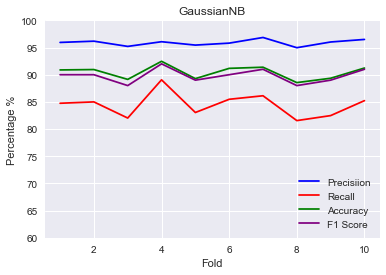

In [7]:
path = "results/naivebayes/GaussianDataComp.json"
plot_data(path, featureSet, title = "GaussianNB")

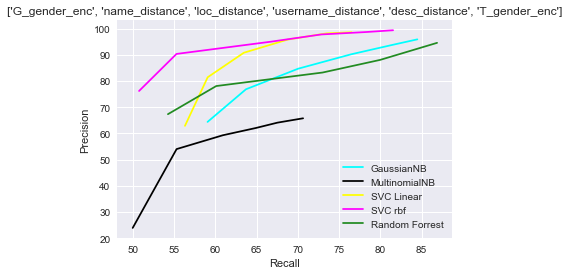

In [25]:
paths = ["results/naivebayes/GaussianResultsComp.json",
        "results/naivebayes/MultinomialResultsComp.json",
        "results/SVM/SVCLinearResults.json",
        "results/SVM/SVCrbfResults.json",
        "results/RandomForrest/RandomForrestEst1000Results.json"]
precision_recall_curve(paths, featureSet)

[62.098333333333336, 48.85, 62.15666666666666, 63.68333333333333, 62.44666666666668]
[90.44, 66.92, 87.74, 90.52, 90.95]


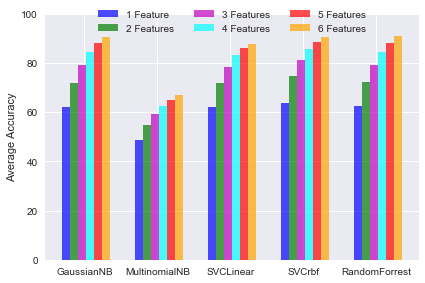

In [17]:
paths = ["results/naivebayes/GaussianResultsComp.json",
        "results/naivebayes/MultinomialResultsComp.json",
        "results/SVM/SVCLinearResults.json",
        "results/SVM/SVCrbfResults.json",
        "results/RandomForrest/RandomForrestEst1000Results.json"]
plot_best_metric(paths, "Accuracy")

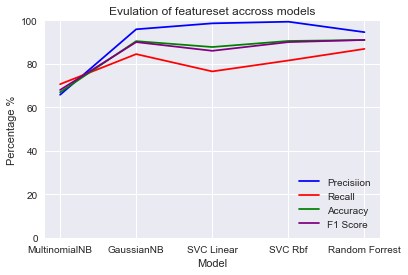

In [10]:
paths = ["results/naivebayes/MultinomialResultsComp.json",
        "results/naivebayes/GaussianResultsComp.json",
        "results/SVM/SVCLinearResults.json",
        "results/SVM/SVCrbfResults.json",
        "results/RandomForrest/RandomForrestEst1000Results.json"]
plot_everything(paths, featureSet, title="Evulation of featureset accross models")

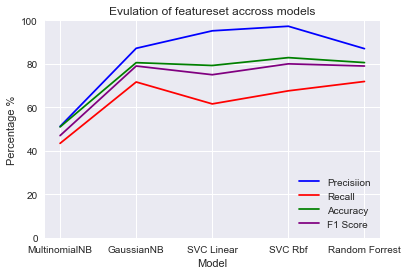

In [11]:
plot_everything(paths, ['username_distance', "loc_distance"], title="Evulation of featureset accross models")